### In this notebook, we create graphs using Texas dataset

#run this to convert into slides
#jupyter nbconvert --to slides Main_Analysis_Present.ipynb

In [1]:
import numpy as np
import pandas as pd
import plotly

plotly.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_pickle('./Data/Texas')

<img src="news.png" alt="Drawing" style="width: 1500px;"/>

# How Chain Restaurants Can Harness Invaluable Insights from Online Customer Reviews

# Outline

## 1. Yelp Ratings Over Time
## 2. Average Yelp Ratings Over Time
## 3. Further Yelp Data Mining
 ### - Number of Yelp Reviews Over Time
 ### - User Location
 ### - Competitor Data
 
## Examples: Shake Shack (New York), In-N-Out Burger (California)

**Disclaimer: This project reflects the views of the author and should not be construed to represent the U.S. Food and Drug Administration's views or policies.**

# I. Yelp Ratings Over Time

In [3]:
df_ino_plano = df[(df['restaurant'] == 'In-N-Out') & (df['outlet'] == 'Plano')][['date','rating','content']].copy()

In [4]:
df_ino_plano_sorted = df_ino_plano.sort_values('date')

In [ ]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import pandas as pd

dallas_uptown = go.Scatter(
    x=df_ino_plano_sorted['date'],
    y=df_ino_plano_sorted['rating'],
    name = "PLano",
    marker={'color': 'red', 'symbol': 104, 'size': "10"},
    line={'color': 'blue'},
    mode = 'lines+markers',
    opacity = 0.8)

data = [dallas_uptown]

layout = dict(
    title='Yelp Ratings Over Time (In-N-Out, Plano, TX) ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)

In [5]:
plotly.offline.iplot(fig, show_link=False)

In [6]:
pd.set_option('display.max_colwidth', -1)

In [7]:
df_ino_plano_sorted[(df_ino_plano_sorted['date'] > '2017-3-10') & (df_ino_plano_sorted['date'] < '2017-7-20')][['date','content', 'rating']]

,date,content,rating
32,2017-03-16,I literally just drive through. Got a burger and unsweet tea. I pulled away and took of sip of tea only to get a mouth full of tea grounds. I turned back in and parked went in. The girl that just took my $ and gave me my food and drink looked at me like a space cadet. I said this is full of tea grounds. She is confused. She takes the drink...doesn't apologize. Walks over to the sink and starts to poor it out and then realizes what the heck I'm talking about. She then walks by me to the dining room and fills another unsweet tea walks back to me and says 'is this better?' I take the paper off the straw and she says again 'is this better?' I'm like WHAT THE HELL!!! I haven't even had a chance to take a drink!!!! I finally take a sip and said yes it is. She grins and walks off. Still no apology. Nothing. Except utter frustration. Too many other awesome burgers around in this city. Enough said.,2.0
12,2017-05-01,Great place for quick affordable food.Near the Motel 6 I'm staying at. Friendly people and Open late.Affordable and Super Clean.,5.0
16,2017-05-26,"New to Texas and first time trying In N Out Burger. I heard about it online, social media. I was not impressed. I ordered the #3, the hamburger combo. I really wanted to try the special sauce. It was very basic. Nothing special about the hamburger or fries. Not sure what the hype is about. I guess if it's late and you're hungry it would be the place to go as they are open until 1:30a I think. I would rather have a burger from Sonic or WhatABurger. If you want a basic burger for the low then In N Out Burger is the place for you. It was not very expensive. About $6 for the combo.",2.0
14,2017-06-26,"Coming from Ohio, this is one of the most talked about go-to places when visiting the South. You just HAVE to go and experience it. Walking in, I was greeted right away. You would expect fast food workers to hate their lives and show it. This is the first time I've ever seen a staff so energetic and friendly. That is what made this trip for me. The menu is short, the burgers are great, and the fries are nothing too great, even the workers say so.",4.0
13,2017-07-19,"I went to In N Out because I was craving their burgers last night. I ordered two burgers for my friend and I. Unfortunately, my burger had a long strand of hair in it and it got stuck on the back of my throat while eating. How disgusting is that? - I literally had to pull out someone's hair from my mouth. Very very disappointed smh. Also, the employee rushed me at the drive thru and forgot to give me my drink and I had to make a 360 to go back for my soda to get it. Which wasnt as bad as choking on hair but it was still not professional. That's two things about In N Out in Plano that were very disappointing to me. I wont be going back!",1.0


# II. Average Yelp Ratings Over Time

In [5]:
outlets_ino = df[df['restaurant'] == 'In-N-Out']['outlet'].unique().tolist()
outlets_ino

['Plano', 'Dallas North', 'Dallas UG']

In [6]:
df_ino = df[df['restaurant'] == 'In-N-Out'].copy()

In [7]:
def get_means(df_local, outlet):
    df_outlet = df_local[df_local.outlet == outlet]
    df_outlet_sort = df_outlet[['outlet','date','year','month','day','rating']].sort_values(['year', 'month', 'day'])
    df_index = df_outlet_sort.reset_index()
    nrow = df_index.shape[0]
    df_index['rating_means'] = df_index['rating'].apply(lambda x: 0*x)
    for i in range(nrow):
        if i == 0:
            df_index['rating_means'].iloc[i] = df_index['rating'].iloc[i]
        else:
            df_index['rating_means'].iloc[i] = (1-1/(i+1))*df_index['rating_means'].iloc[i-1] \
            + df_index['rating'].iloc[i]/(i+1)
    return df_index

dframes = []
for outlet in outlets_ino:
    frame = get_means(df_ino, outlet)
    dframes.append(frame)
df_ino_means = pd.concat(dframes)    

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## a. Average Yelp Ratings - Plano, TX

In [8]:
df_ino_means[df_ino_means.outlet == 'Plano'][['outlet','date','rating', 'rating_means']].head()

,outlet,date,rating,rating_means
0,Plano,2012-06-30,5.0,5.000000
1,Plano,2012-07-03,4.0,4.500000
2,Plano,2012-07-04,2.0,3.666667
3,Plano,2012-07-06,1.0,3.000000
4,Plano,2012-07-13,5.0,3.400000


In [ ]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import pandas as pd

plano = go.Scatter(
    x=df_ino_means[df_ino_means.outlet == 'Plano'].date,#.sort_values(),
    y=df_ino_means[df_ino_means.outlet == 'Plano']['rating_means'],
    name = "Plano, X",
    line={'color': 'orange'},
    mode = 'lines+markers',
    opacity = 0.8)

data = [plano]

layout = dict(
    title='Average Yelp Rating Over Time (In-N-Out, Plano, TX)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)

In [49]:
plotly.offline.iplot(fig, show_link=False)

## b. Average Yelp Ratings - Dallas Upper Greenville (UG), Dallas North, and Plano

In [ ]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import pandas as pd

dallas_ug = go.Scatter(
    x=df_ino_means[df_ino_means.outlet == 'Dallas UG'].date,#.sort_values(),
    y=df_ino_means[df_ino_means.outlet == 'Dallas UG']['rating_means'],
    name = "Dallas UG",
    line={'color': 'blue'},
    mode = 'lines+markers',
    opacity = 0.8)

dallas_north = go.Scatter(
    x=df_ino_means[df_ino_means.outlet == 'Dallas North'].date,#.sort_values(),
    y=df_ino_means[df_ino_means.outlet == 'Dallas North']['rating_means'],
    name = "Dallas North",
    line={'color': 'green'},
    mode = 'lines+markers',
    opacity = 0.8)

plano = go.Scatter(
    x=df_ino_means[df_ino_means.outlet == 'Plano'].date,#.sort_values(),
    y=df_ino_means[df_ino_means.outlet == 'Plano']['rating_means'],
    name = "Plano, TX",
    line={'color': 'orange'},
    mode = 'lines+markers',
    opacity = 0.8)


data = [dallas_ug, dallas_north, plano]

layout = dict(
    title='Average Yelp Ratings Over Time (In-N-Out, Texas)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)

In [13]:
plotly.offline.iplot(fig, show_link=False)

In [14]:
df[df['restaurant'] == 'In-N-Out'][['outlet', 'rating']].groupby(['outlet']).mean()

,rating
outlet,
Dallas North,3.456790
Dallas UG,3.534483
Plano,3.915094


### - save outlets data

In [9]:
def get_date_month(x):
    return str(x.year) + '-' + str(x.month)

df['date_month'] = df['date'].apply(lambda x: get_date_month(x))
df['date_month'] = pd.to_datetime(df['date_month'])

In [10]:
df_ino_dallas_ug = df[(df['restaurant'] == 'In-N-Out') & (df['outlet'] == 'Dallas UG')]
df_ino_dallas_north = df[(df['restaurant'] == 'In-N-Out') & (df['outlet'] == 'Dallas North')]
df_ino_plano = df[(df['restaurant'] == 'In-N-Out') & (df['outlet'] == 'Plano')]

# III. Further Yelp Data Mining

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [12]:
df = pd.read_pickle('./Data/New_York')

## A. Number of Reviews Over Time (In-N-Out and Shake Shack)

### - Texas (In-N-Out)

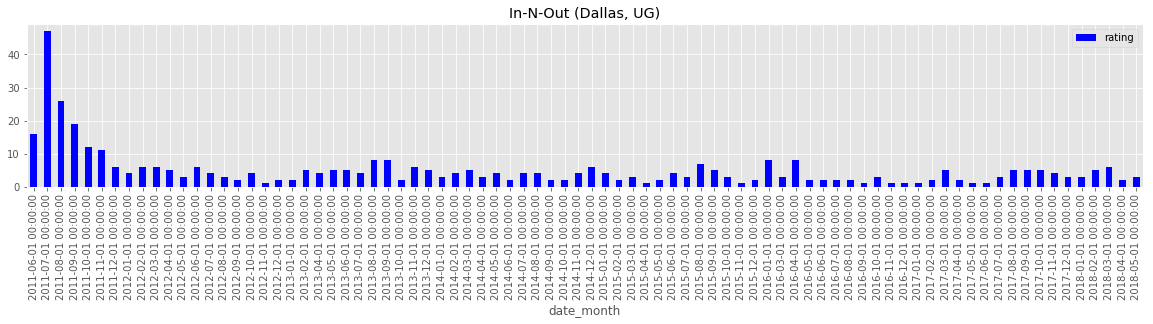

In [14]:
plt.rcParams["figure.figsize"] = (20,3)
group_month_ino_dallas_ug = df_ino_dallas_ug[['date_month','rating']].groupby(['date_month'])
group_month_ino_dallas_ug.count().plot(kind='bar', color='b', title = 'In-N-Out (Dallas, UG)');

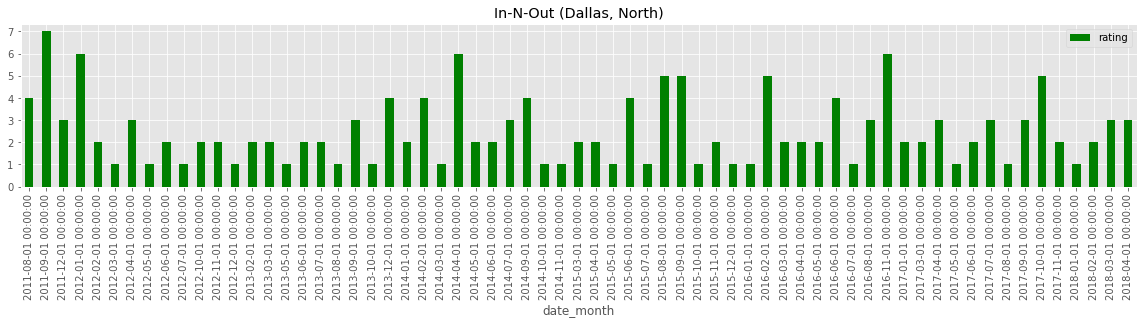

In [15]:
plt.rcParams["figure.figsize"] = (20,3)
group_month_ino_dallas_north = df_ino_dallas_north[['date_month','rating']].groupby(['date_month'])
group_month_ino_dallas_north.count().plot(kind='bar', color='green', title = 'In-N-Out (Dallas, North)');

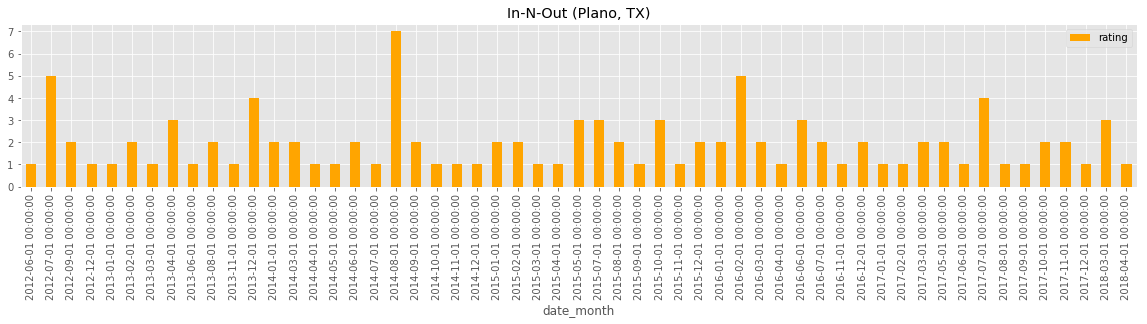

In [16]:
plt.rcParams["figure.figsize"] = (20,3)
group_month_ino_plano = df_ino_plano[['date_month','rating']].groupby(['date_month'])
group_month_ino_plano.count().plot(kind='bar', color='orange', title = 'In-N-Out (Plano, TX)');

### - New York (Shake Shack)

In [17]:
df_msp = df[df['outlet'] == 'Madison SP']
df_queens = df[df['outlet'] == 'Queens']
df_upper_east_side = df[df['outlet'] == 'Upper ES']
df_miami_beach = df[df['outlet'] == 'Miami Beach']
df_dupont_circle = df[df['outlet'] == 'Dupont Circle']

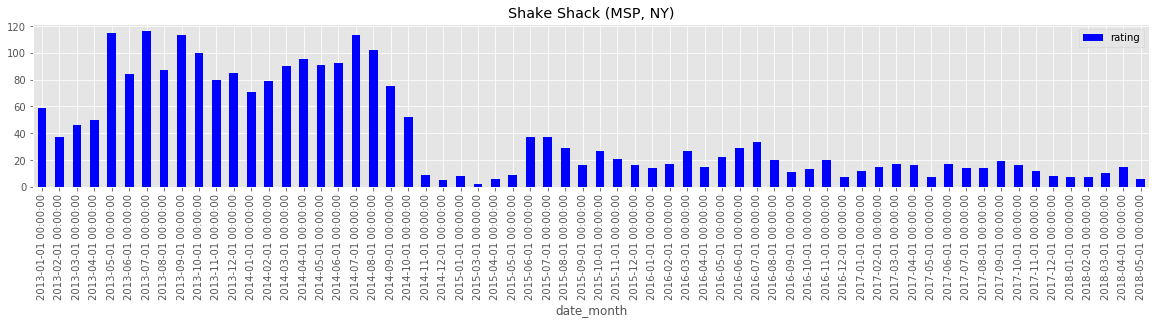

In [18]:
plt.rcParams["figure.figsize"] = (20,3)
df_month_msp = df_msp[df_msp['year'].isin(np.arange(2013,2019))]
group_month_msp = df_month_msp[['date_month','rating']].groupby(['date_month'])
group_month_msp.count().plot(kind='bar', color='b', title = 'Shake Shack (MSP, NY)');

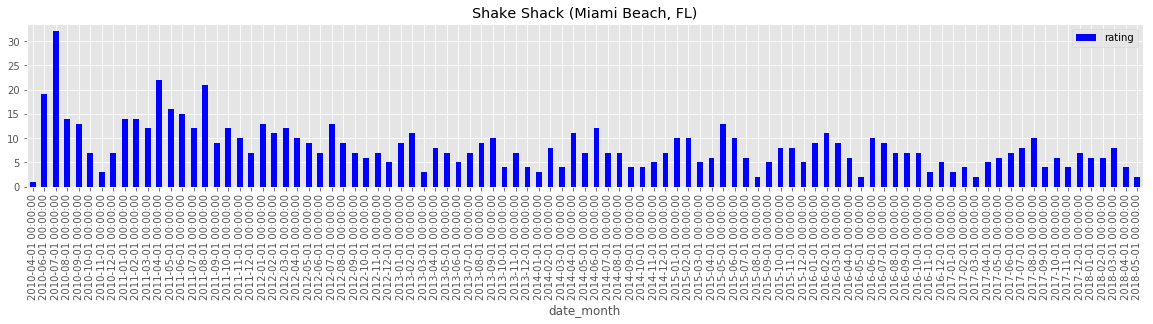

In [19]:
plt.rcParams["figure.figsize"] = (20,3)
df_month_miami_beach = df_miami_beach[df_miami_beach['year'].isin(np.arange(2010,2019))]
group_month_miami_beach = df_month_miami_beach[['date_month','rating']].groupby(['date_month'])
group_month_miami_beach.count().plot(kind='bar', color='b', title = 'Shake Shack (Miami Beach, FL)');

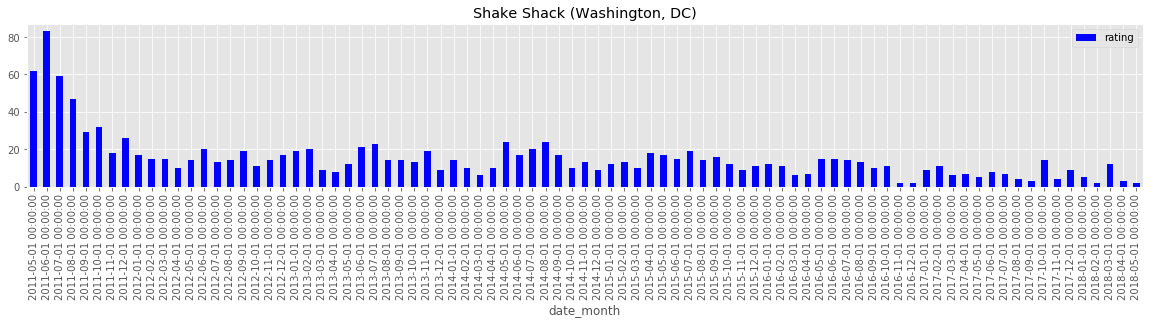

In [20]:
plt.rcParams["figure.figsize"] = (20,3)
df_month_dupont_circle = df_dupont_circle[df_dupont_circle['year'].isin(np.arange(2010,2019))]
group_month_dupont_circle = df_month_dupont_circle[['date_month','rating']].groupby(['date_month'])
group_month_dupont_circle.count().plot(kind='bar', color='b', title = 'Shake Shack (Washington, DC)');

## B. User Location (Shake Shack)  

### a. Local (New York) versus Non-Local

In [26]:
df_NY = df[df['outlet'].isin(['Madison SP', 'Upper WS', 'Queens', 'Upper ES', 'Hells Kitchen', \
                                   'Saratoga S', 'Battery Park'])]

In [50]:
group_locality_NY = df_NY.groupby(['locality'])

In [51]:
group_locality_NY.agg(['count', 'mean', 'std', 'median'])['rating']

,count,mean,std,median
locality,,,,
Local,5608,3.894971,1.059420,4.0
Non-local,6855,3.999271,1.003132,4.0


### b. Country (Foreign or Domestic)

In [52]:
group_country_NY = df_NY.groupby(['country'])

In [53]:
group_country_NY.agg(['count', 'mean', 'std', 'median'])['rating']

,count,mean,std,median
country,,,,
Non-US,452,3.988938,1.036950,4.0
US,12011,3.950962,1.029867,4.0


### c. States

#### - up to present

In [29]:
group_state = df_NY[df_NY['country'] == 'US'].groupby('state')

In [30]:
group_state.agg(['count', 'mean', 'std', 'median'])['rating'].sort_values('count', ascending = False).head(10)

,count,mean,std,median
state,,,,
NY,5608,3.894971,1.059420,4.0
CA,3090,4.011327,0.975352,4.0
NJ,589,3.838710,1.076715,4.0
TX,358,4.078212,0.992705,4.0
FL,226,3.969027,1.144617,4.0
WA,203,4.019704,0.974733,4.0
IL,200,4.010000,1.022314,4.0
MA,189,4.026455,1.007598,4.0
PA,142,3.943662,0.987688,4.0


#### - up to 2010

In [31]:
group_state_2010 = df_NY[(df_NY['country'] == 'US') & (df_NY['date'] <= '2010-01-01')].groupby('state')

In [32]:
group_state_2010.agg(['count', 'mean', 'std', 'median'])['rating'].sort_values('count', ascending = False).head(10)

,count,mean,std,median
state,,,,
NY,698,4.063037,0.887686,4.0
CA,370,4.227027,0.853702,4.0
NJ,33,4.272727,0.875811,4.0
MA,27,4.296296,0.868899,4.0
TX,24,4.083333,0.775532,4.0
WA,23,3.869565,0.967863,4.0
VA,19,4.000000,1.054093,4.0
IL,18,4.222222,1.060275,5.0
DC,15,3.866667,0.833809,4.0


In [36]:
#pd.crosstab(df_NY['state'], df_NY['rating'])

## C. Competitor Data (Shake Shack vs In-N-Out)

In [33]:
df = pd.read_pickle('./Data/Texas')

### - direct comparison

In [34]:
group_resto = df.groupby(['restaurant','outlet'])

In [35]:
group_resto.agg(['count', 'mean', 'std', 'median'])['rating']

count      mean       std  median
restaurant  outlet                                          
In-N-Out    Dallas North   162    3.456790  1.333276  4.0   
            Dallas UG      406    3.534483  1.292922  4.0   
            Plano          106    3.915094  1.172039  4.0   
Shake Shack Dallas North   51     3.450980  1.171558  3.0   
            Dallas Uptown  411    3.598540  1.216512  4.0   
            Plano          280    3.571429  1.273625  4.0

In [36]:
df = pd.read_pickle('./Data/Texas')

In [37]:
df_ss = df[df['restaurant'] == 'Shake Shack'].copy()

In [38]:
outlets_ss = df[df['restaurant'] == 'Shake Shack']['outlet'].unique().tolist()
outlets_ss

['Plano', 'Dallas North', 'Dallas Uptown']

In [39]:
def get_means(df_local, outlet):
    df_outlet = df_local[df_local.outlet == outlet]
    df_outlet_sort = df_outlet[['outlet','date','year','month','day','rating']].sort_values(['year', 'month', 'day'])
    df_index = df_outlet_sort.reset_index()
    nrow = df_index.shape[0]
    df_index['rating_means'] = df_index['rating'].apply(lambda x: 0*x)
    for i in range(nrow):
        if i == 0:
            df_index['rating_means'].iloc[i] = df_index['rating'].iloc[i]
        else:
            df_index['rating_means'].iloc[i] = (1-1/(i+1))*df_index['rating_means'].iloc[i-1] \
            + df_index['rating'].iloc[i]/(i+1)
    return df_index

dframes = []
for outlet in outlets_ss:
    frame = get_means(df_ss, outlet)
    dframes.append(frame)
df_ss_means = pd.concat(dframes)    

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import pandas as pd

ss_dallas_uptown = go.Scatter(
    x=df_ss_means[df_ss_means.outlet == 'Dallas Uptown'].date,#.sort_values(),
    y=df_ss_means[df_ss_means.outlet == 'Dallas Uptown']['rating_means'],
    name = "Dallas Uptown (Shake Shack)",
    line={'color': 'blue'},
    #mode = 'lines+markers',
    mode = 'lines',
    opacity = 0.8)

ss_dallas_north = go.Scatter(
    x=df_ss_means[df_ss_means.outlet == 'Dallas North'].date,#.sort_values(),
    y=df_ss_means[df_ss_means.outlet == 'Dallas North']['rating_means'],
    name = "Dallas North (Shake Shack)",
    line={'color': 'green'},
    #mode = 'lines+markers',
    mode = 'lines',
    opacity = 0.8)

ss_plano = go.Scatter(
    x=df_ss_means[df_ss_means.outlet == 'Plano'].date,#.sort_values(),
    y=df_ss_means[df_ss_means.outlet == 'Plano']['rating_means'],
    name = "Plano, TX (Shake Shack)",
    line={'color': 'orange'},
    #mode = 'lines+markers',
    mode = 'lines',
    opacity = 0.8)

ino_dallas_ug = go.Scatter(
    x=df_ino_means[df_ino_means.outlet == 'Dallas UG'].date,#.sort_values(),
    y=df_ino_means[df_ino_means.outlet == 'Dallas UG']['rating_means'],
    name = "Dallas UG (In-N-Out)",
    line={'color': 'blue'},
    mode = 'lines+markers',
    opacity = 0.8)

ino_dallas_north = go.Scatter(
    x=df_ino_means[df_ino_means.outlet == 'Dallas North'].date,#.sort_values(),
    y=df_ino_means[df_ino_means.outlet == 'Dallas North']['rating_means'],
    name = "Dallas North (In-N-Out)",
    line={'color': 'green'},
    mode = 'lines+markers',
    opacity = 0.8)

ino_plano = go.Scatter(
    x=df_ino_means[df_ino_means.outlet == 'Plano'].date,#.sort_values(),
    y=df_ino_means[df_ino_means.outlet == 'Plano']['rating_means'],
    name = "Plano, TX (In-N-Out)",
    line={'color': 'orange'},
    mode = 'lines+markers',
    opacity = 0.8)


data = [ss_dallas_uptown, ss_dallas_north, ss_plano, ino_dallas_ug, ino_dallas_north, ino_plano]

layout = dict(
    title='Average Yelp Ratings Over Time (In-N-Out and Shake Shack)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)

In [40]:
plotly.offline.iplot(fig, show_link=False)

### - mining review content

In [41]:
df_NY_CA = df_NY[df_NY['state'] == 'CA'].copy()

In [42]:
df_NY_CA.shape

(3090, 16)

In [43]:
def find_ino(x):
    return 'in-n-out' in x.lower().split()
    
df_NY_CA['ino'] = df_NY_CA['content'].apply(lambda x: find_ino(x))    

In [44]:
df_NY_CA['content'].iloc[0].lower().split()[:5]

['horrible', 'service!', 'my', 'wife', 'waited']

In [50]:
#pd.set_option('max_colwidth',200)
#pd.set_option('display.max_columns', 1)

In [45]:
pd.options.display.max_colwidth

-1

In [46]:
df_NY_CA[df_NY_CA['ino']==True][['content','rating']].head()

,content,rating
32,"I am an In-n-out loyal, but in NYC where there is no In-n-out, Shake Shack rules! No matter how long the line, it moves pretty quick and is totally worth the wait. Love their burgers, crinkle fries, shakes and malts. Comfort food at its best!",5.0
46,"I waited long and hard to finally have Shake Shack at the original Madison Square Park location and it was WORTH it. The shack burger is very tasty and the fries were very well fried. The buns were so soft...so good. The fries are crinkle cut but they are the best crinkle cut I've ever had. I'm from California and I LOVE in-n-out and my friends (mostly from outside of California) have always said that Shake Shack was waaaay better. My conclusion is that they cannot be grouped in the same category! They're different burgers and different fries, but both are delicious and have great service! Overall, I'd have Shake Shack again!",4.0
122,"This location is nice because it's in the park and all the outdoor tables. It's like a little getaway. There was other stuff going on in the park but the Shack Shack got the most attention. You first notice the long line but it moves fairly quickly.While you are waiting, they hand out menus to look at.We opt for the Shack Burger, the Smoke Shack, Chick'n Shack, and fries.After you place an order, they give you that restaurant pager thing.Also, if you want to order just a drink or beverage there is the express line.(It was kinda confusing at first but after standing in line for a bit, figured it out.)We order the:Shack Burger - It's a good all around burger with lettuce and tomato. The bun is on the sweeter side and overall, a very good burger. Much better than any fast food burger.Smoke Shack - This sounds better on paper but when you get the burger, it's topped with bacon, cheese, chopped cherry pepper, and their Shack Sauce. It's a bit salty since there's no lettuce or tomato. It's literally, bacon, cheese, the peppers and the sauce. It needs some lettuce, tomatoes, and onion. Maybe the key is to order the Smoke Shack and ask for lettuce, tomato, and maybe onions cause by itself it's a salty but tasty burger.Chick'n Shack - this was definitely the star. The crispy chicken patty is thicker than the burgers and side by side, the Chick'n Shack looks more appetizing. The patty is really crispy.Fries: These are really crispy. This is what all fries hope to taste like... crispy, a little salty... yep, you gotta get their crinkle cut fries. I couldn't stop eating them.Pretty good burger and chicken sandwiches. And here's my take on...Shack Shack vs. In-N-Out: The sweet bun at Shack Shack makes the overall burger a bit on the sweet side. I like In-N-Out better since the focus is on the savory meat, cheese, lettuce, tomatoes, and onions, where as the Shake Shack burger you notice the sweet bun stands out a bit too much. In-N-Out anyday. & Shack Shack vs. Chik-Fil-A: I do think Shack Shake's chicken sandwiches are the way to go, but I think Chik-Fil-A does it better with their larger white meat chicken patty. Plus, Chik-Fil-A has their sauce. Chik-Fil-A any day.",4.0
144,"Oooh look...a Shake Shack! Hit up this Madison Square Park spot at night and the place was packed! I was told this is the In-n-Out version NY style. Hmmm... it's too bad I don't eat meat so that I could have a better comparison. I like that's there's a non-meat option (not just lettuce and tomato) available for non-meat eaters. Yes, I am a fan of this option! Disclaimer: this does not mean the meal is any healthier. I opted to order the 'Shroom Burger. Bun's flavor was consistent to I-N-O's, but not similar in texture. SS has a bit thicker set of buns (that's what she said). The mushroom and cheese, coated with a type of breading, was deep fried to perfection. Grease did not ooze out when I took a bite (maybe the thicker buns absorbed it). Honestly after walking 18 miles around NY (coz my fitbit said so) after a red eye flight- the calories were not a bother at the tim

In [47]:
df_NY_CA[df_NY_CA['ino']==True]['rating'].mean()

3.943632567849687